In [513]:
# This code is written to support the experiments in the book titled:
# "Adaptive Machine Learning Algorithms"
# by
# Chanchal Chatterjee and Vwani P. Roychowdhury
# August 2021
#
# Experiments for Chapter 2 - Anomaly Detection Example
#
# Author: Chanchal Chatterjee
#

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#import tensorflow as tf


In [3]:
X = pd.read_csv("../Data/real_data.csv")
X = X.dropna().drop(['idx'],1)

print(X.shape)
print(X.head())


(1420, 8)
     value1    value2    value3    value4    value5    value6    value7  \
0  0.898745  0.980353  0.812193  0.922791  0.878115  0.910894  1.107865   
1  1.015318  0.986105  0.772422  0.977621  0.882365  0.910894  1.105548   
2  1.117638  0.985756  0.752362  0.993260  0.982274  0.919743  1.112639   
3  1.186144  0.992206  0.801392  0.989028  0.962279  0.915318  1.156243   
4  1.122798  0.991334  0.891038  1.004208  0.971963  0.919743  1.121492   

     value8  
0  0.326298  
1  0.410852  
2  1.018607  
3  1.044412  
4  1.064805  


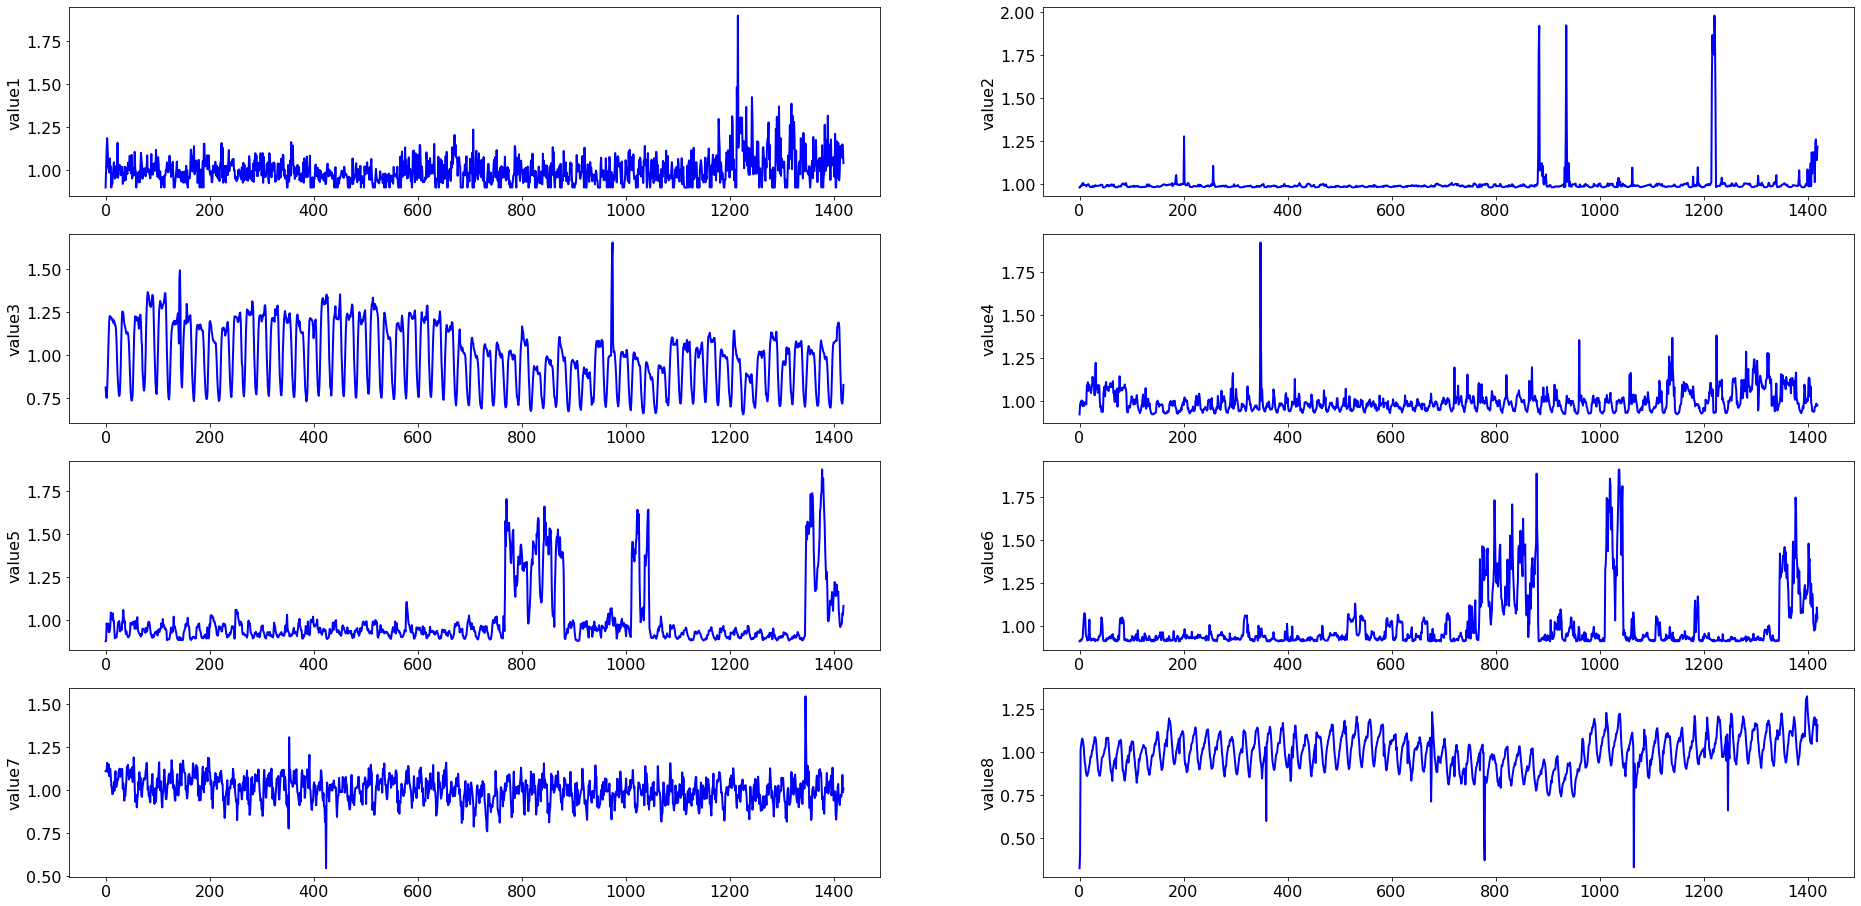

In [4]:
plt.figure(figsize=(32, 16))
plt.rcParams.update({'font.size': 16})
cols = X.columns
for i in range(X.shape[1]):
    plt.subplot(4, 2, i+1)
    plt.ylabel(cols[i])
    plt.plot(X[cols[i]], lw=2, color='b')
plt.show()

In [5]:
# Compute Correlation matrix and eigen vectors of the generated data
from numpy import linalg as la
MedianX = X.median()
print("MedianX=\n", MedianX)

MedianX=
 value1    0.987068
value2    0.988632
value3    1.005050
value4    0.985946
value5    0.939391
value6    0.933018
value7    1.003425
value8    1.002138
dtype: float64


In [6]:
# Adaptive algorithm
from numpy import linalg as la

nSamples = X.shape[0]
nDim = X.shape[1]

w = np.zeros(shape=(nDim,1)) # stores adaptive eigenvectors
anam = np.zeros(shape=(nDim,nSamples))
mdks = np.zeros(shape=(nDim,nSamples))
for iter in range(nSamples):
    cnt = iter + 1
    x = np.array(X.iloc[iter])
    x = x.reshape(nDim,1)
    #Eq.2.20
    w = w + (1/(1 + iter)) * np.sign(x - w)
    mdks[:,iter] = w.T
    y = (np.abs(x-w) > 0.5*w)*1
    anam[:,iter] = y.T
print("w=\n", w.T)


w=
 [[1.02754206 0.99734428 0.9616305  1.02862005 0.95914532 0.97454134
  0.98647849 1.06250567]]


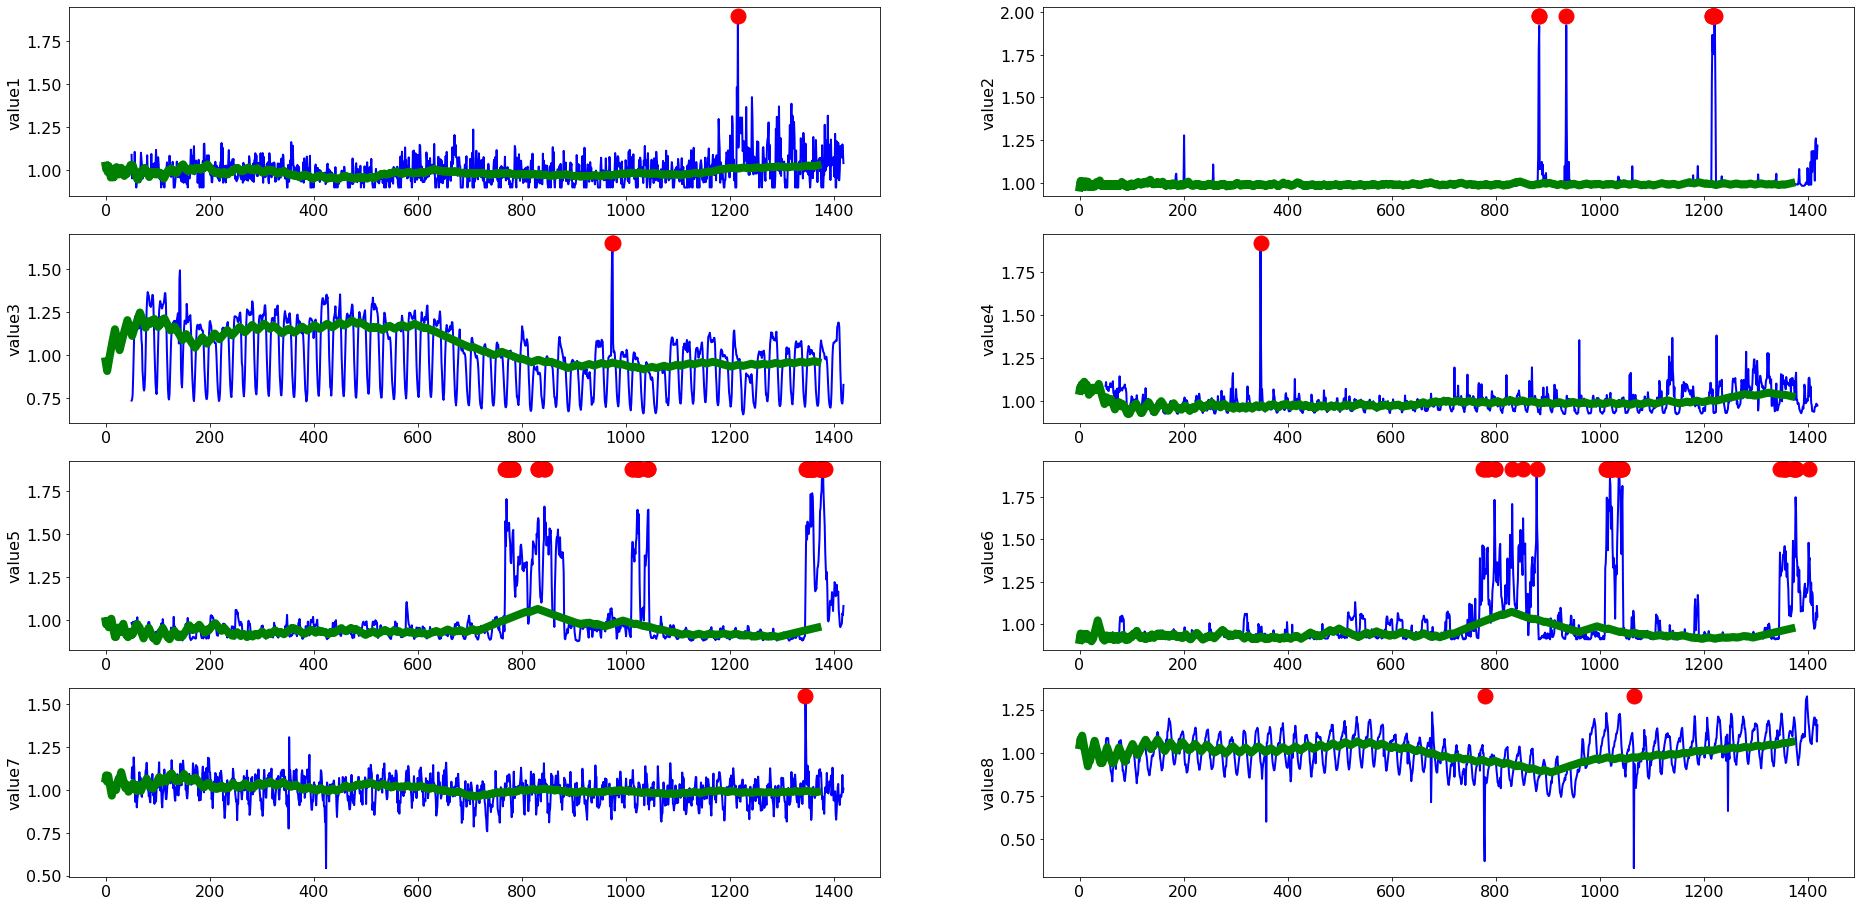

In [7]:
clip = 50
plt.figure(figsize=(32, 16))
plt.rcParams.update({'font.size': 16})
cols = X.columns
for i in range(X.shape[1]):
    plt.subplot(4, 2, i+1)
    plt.ylabel(cols[i])
    plt.plot(X[cols[i]][clip:], lw=2, color='b')
    plt.plot(mdks[i][clip:], lw=8, color='g')
    for j in range(clip,anam.shape[1]):
        if (anam[i,j] > 0):
            plt.plot(j, (X.max())[i] * anam[i,j], 'o', markersize=15, color='r')
plt.show()